## Geometrics Example 01 - Clausius-Claperyon
#### Demonstrates: Basic Usage, Curve Fitting, Data-Model Comparison
Author - Lara Tobias-Tarsh (laratt@umich.edu)

The first example workbook uses the Clausius-Claperyon relationship to explore the basic analytic and model-fitting capabilities of GeoMetrics. 

We use a year's worth of observational data for Fairbanks Airport, AK, provided by the Iowa State Mesonet[add link here]. 

[add information about CC relationship and relative humidity]

In [1]:
## IMPORTS ##
import numpy as np               # used for basically everything outside of geometrics
import pandas as pd              # used here ONLY to read in data
import geometrics                # for testing just import everything
import matplotlib.pyplot as plt  # might not be needed - check later

First, we read in the data. In this example we will explore how GeoMetrics integrates with the Pandas package for reading CSV files, although this can be done using a number of other methods such as the inbuilt Python CSV package, or numpy's genfromtxt function. Indeed, GeoMetrics contains a couple of crude file readers which can be used for very standardised filetypes in the geosciences such as CSVs and NetCDFs. The CSV reader is built on genfromtxt, which is arguably the most flexible option for reading in CSVs. Example 02 goes over this function and demonstrates the inbuilt file reader's functionality.

In [2]:
# read in station data using pandas
filepath = f'/Users/laratobias-tarsh/Documents/GeoMetrics/GeoMetrics/examples/example_data/PAFA.csv'
PAFA_df = pd.read_csv(filepath,na_values='M')   # IEM fill values are 'M' for missing

print(f'Columns: {PAFA_df.columns}')    # Check columns that could be analysed
PAFA_df.head()  # preview dataset to get an idea of the structure

Columns: Index(['station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i',
       'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4',
       'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr',
       'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
       'peak_wind_drct', 'peak_wind_time', 'feel', 'metar', 'snowdepth'],
      dtype='object')


,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,PAFA,2020-01-01 00:53,-4.0,-9.9,75.09,0.0,0.0,0.00,28.91,980.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.00,PAFA 010053Z 00000KT 10SM FEW070 BKN200 M20/M2...,NaN
1,PAFA,2020-01-01 01:53,-4.0,-9.9,75.09,0.0,0.0,0.00,28.93,981.0,...,-SN,NaN,NaN,NaN,NaN,NaN,NaN,-4.00,PAFA 010153Z 00000KT 9SM -SN FEW015 SCT070 BKN...,NaN
2,PAFA,2020-01-01 02:53,-2.0,-8.0,74.93,0.0,0.0,0.00,28.94,981.4,...,-SN,NaN,NaN,NaN,NaN,NaN,NaN,-2.00,PAFA 010253Z 00000KT 9SM -SN BKN015 BKN200 M19...,NaN
3,PAFA,2020-01-01 03:53,-2.0,-8.0,74.93,40.0,3.0,0.00,28.95,981.7,...,-SN,NaN,NaN,NaN,NaN,NaN,NaN,-10.18,PAFA 010353Z 04003KT 9SM -SN BKN013 BKN200 M19...,NaN
4,PAFA,2020-01-01 04:53,-2.0,-8.0,74.93,20.0,3.0,0.00,28.95,981.7,...,-SN,NaN,NaN,NaN,NaN,NaN,NaN,-10.18,PAFA 010453Z 02003KT 9SM -SN OVC013 M19/M22 A2...,NaN


### Visual Analysis
The first step in most data analysis routines is to make a visual assessment of the data you are working with. GeoMetrics allows a number of plots and associated statistics to be generated that help to determine the shape and distribution of the data, including determining a best-fit theoretical distrbution for the data from a suite of common distributions for geoscience applications. The most common of these is a Gaussian distribution, which is the foundational assumption for a large portion of the statistical assessments commonly applied to data and supported in the GeoMetrics analysis routines.

The routine we first demonstrate is a normality assessment of the data we will be using to fit our model.

In [3]:
# first extract the variables we want to work with.
temps = np.array(PAFA_df.tmpf)
dewpts = np.array(PAFA_df.dwpf)

print(type(temps),type(dewpts)) # check the datatypes - GeoMetrcis supports arrays and lists

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Kolmogorov-Smirnov Test finds distribution to be statistically different to a normal distribution at a 0.05 signifcance level


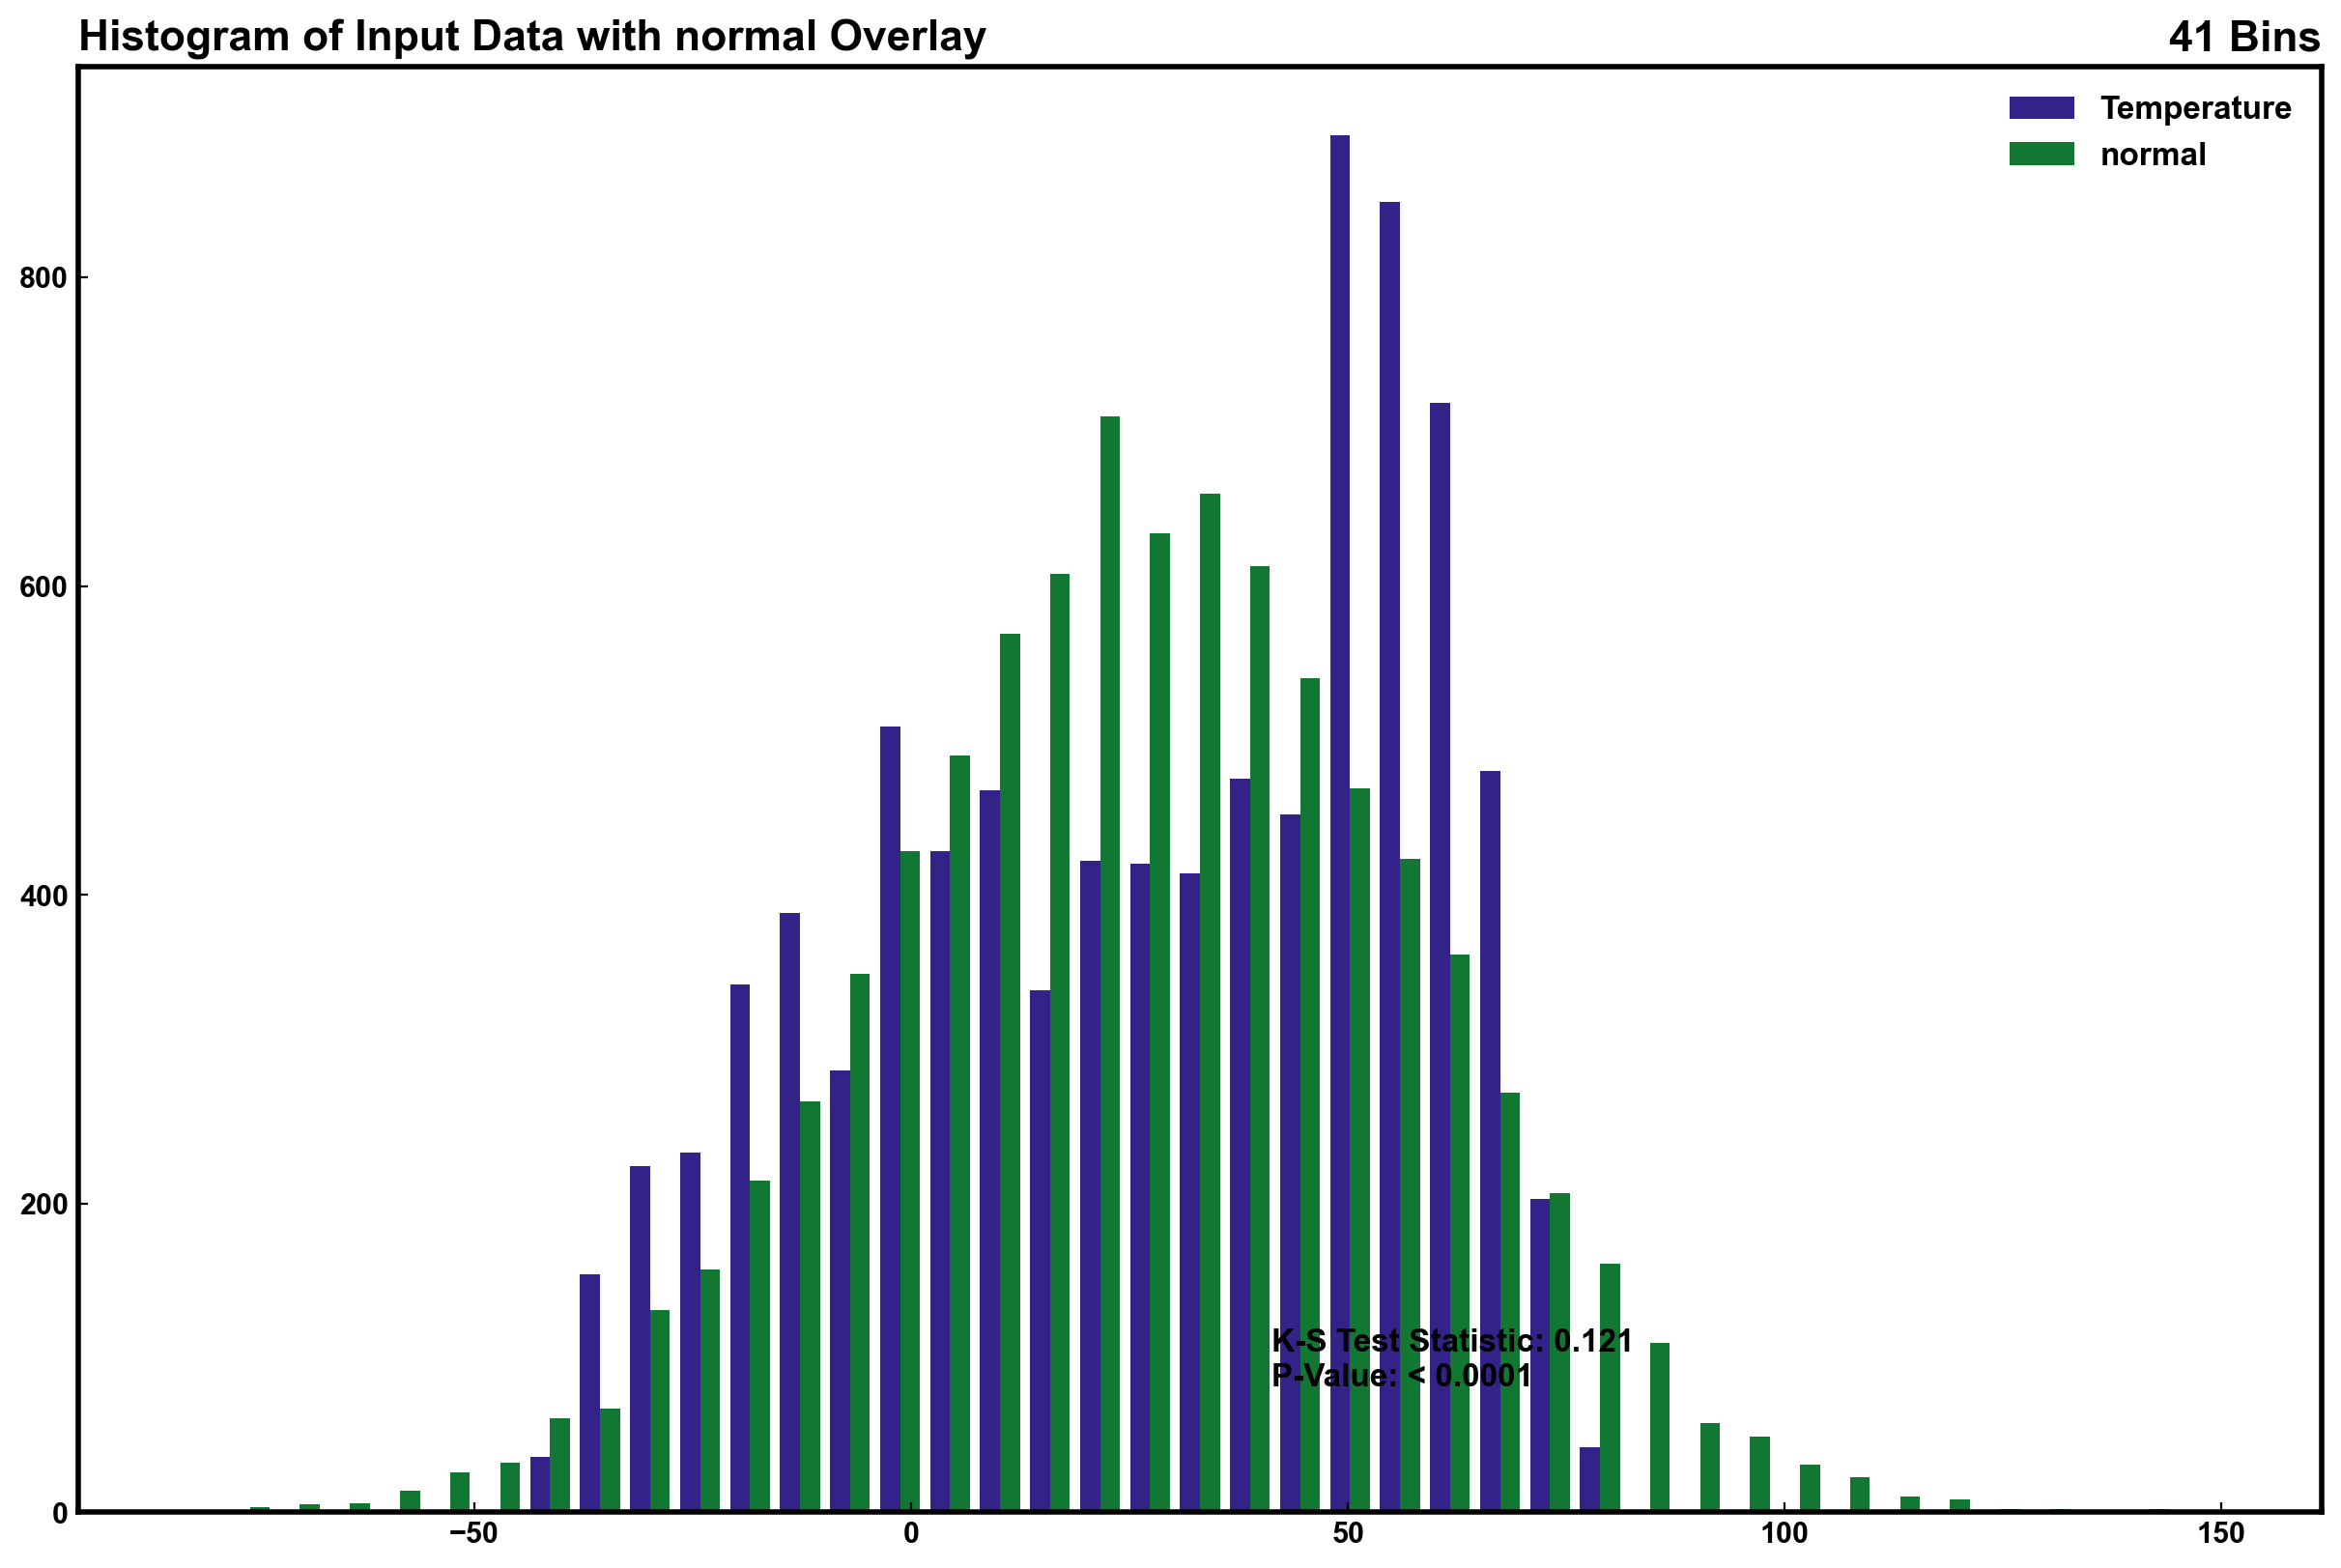

In [4]:
geometrics.plot_histogram({'Temperature':temps},bins='rice',comp_distribution='normal')

In [5]:
a = np.random.normal(size=2000)

In [12]:
geometrics.find_best_fit(temps)

Best Distribution Fit: gumbel left


{'normal': (np.float64(0.12), np.float64(1.8449816323308575e-53)),
 'lognormal': (np.float64(0.11), np.float64(1.2754548744444457e-50)),
 'exponential': (np.float64(0.23), np.float64(2.083401633827374e-205)),
 'logistic': (np.float64(0.1), np.float64(4.770828489577702e-40)),
 'powerlaw': (np.float64(0.12), np.float64(6.266542449180179e-52)),
 'pareto': (np.float64(0.23), np.float64(1.5981035162371413e-197)),
 'genpareto': (np.float64(0.18), np.float64(5.929890493772611e-129)),
 'weibull min': (np.float64(0.1), np.float64(4.363489680523392e-37)),
 'weibull max': (np.float64(0.77), np.float64(0.0)),
 'gumbel right': (np.float64(0.11), np.float64(2.3956691405044888e-48)),
 'gumbel left': (np.float64(0.09), np.float64(3.492187481373872e-33)),
 'inverse normal': (np.float64(0.17), np.float64(2.409624585765468e-115)),
 'gamma': (np.float64(0.11), np.float64(3.19824922446295e-50))}

Kolmogorov-Smirnov Test finds distribution to be statistically different to a gumbel left distribution at a 0.05 signifcance level


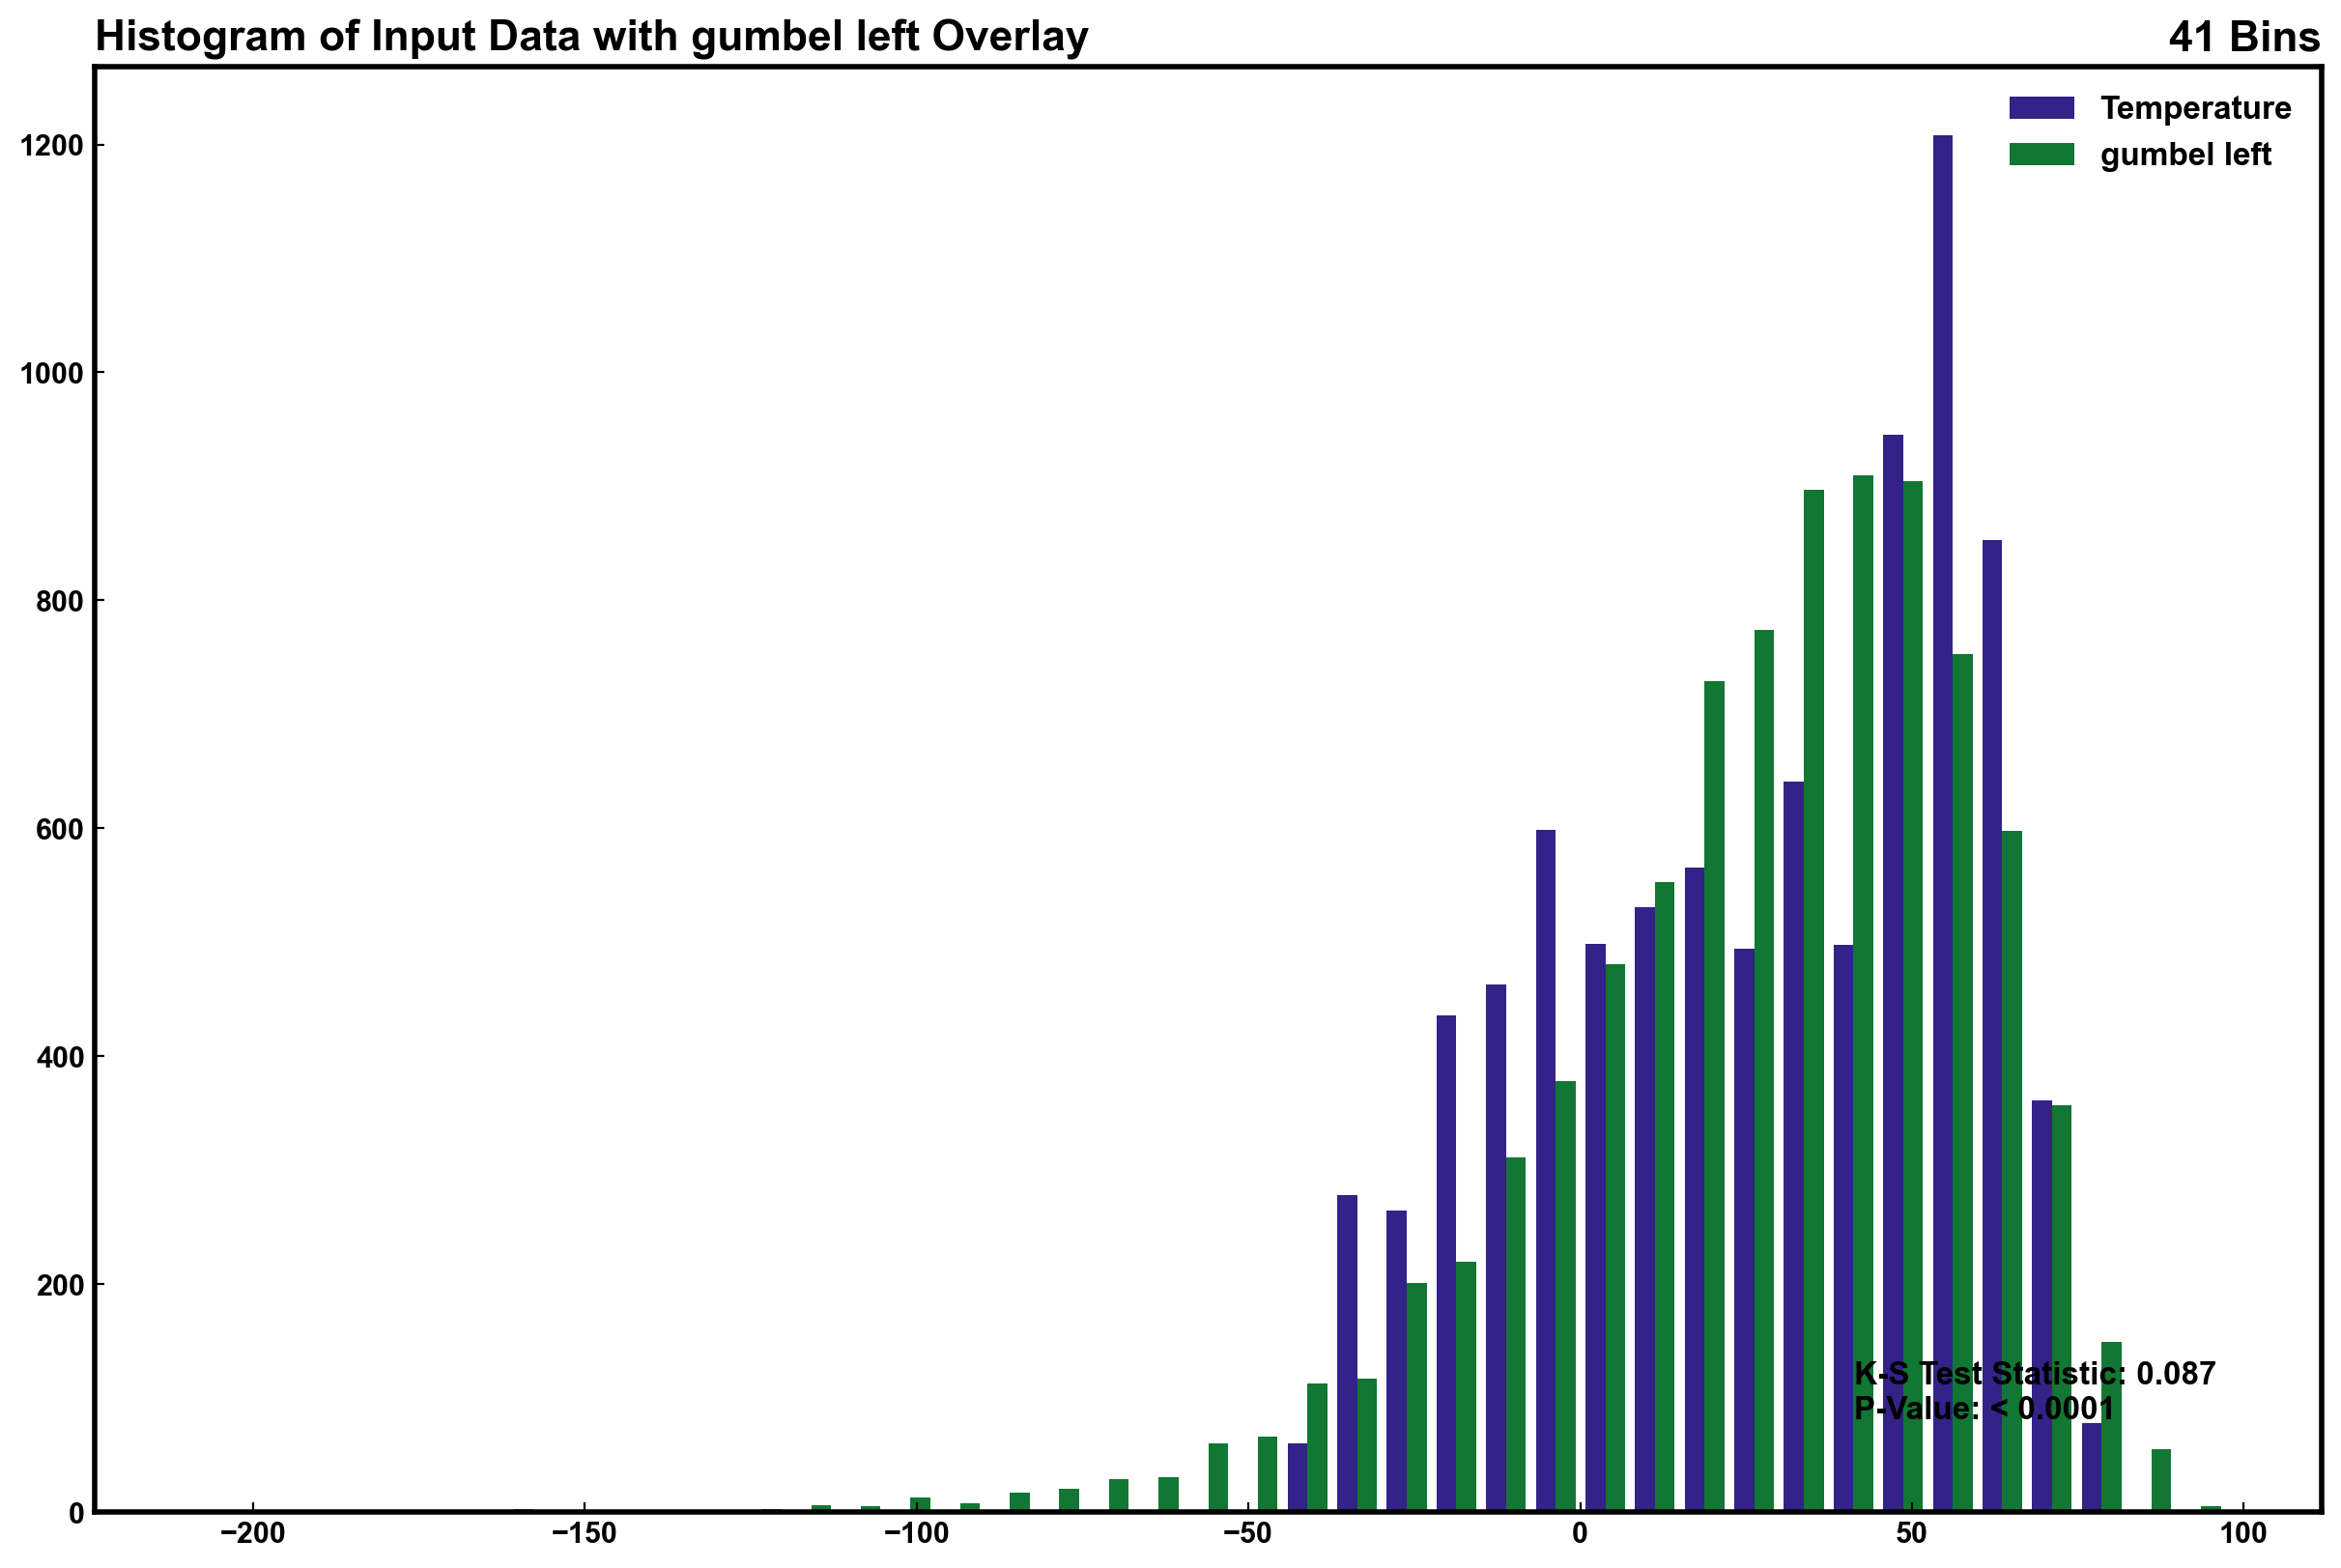

In [14]:
geometrics.plot_histogram({'Temperature':temps},bins='rice',comp_distribution='gumbel left')